# 📊 Online Retail – Exploratory Data Analysis (EDA)

This notebook explores and prepares the **Online Retail (UK)** dataset for a sales forecasting project.

**Objective:** Understand data quality, revenue patterns, and temporal behavior to support downstream machine learning models.

## 1️⃣ Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
# Load both Excel sheets separately
df_2009_2010 = pd.read_excel(
    r"C:\Users\Usuario\Desktop\Nahu\Portfolio-Data\online-retail-forecast-tableau\data\raw\online_retail_II.xlsx",
    sheet_name="Year 2009-2010"
)

df_2010_2011 = pd.read_excel(
    r"C:\Users\Usuario\Desktop\Nahu\Portfolio-Data\online-retail-forecast-tableau\data\raw\online_retail_II.xlsx",
    sheet_name="Year 2010-2011"
)

# Remove overlapping rows from the second sheet
# Excel row 22525 corresponds to index 22524 in pandas (0-based indexing)
df_2010_2011 = df_2010_2011.iloc[22524:].reset_index(drop=True)

# Concatenate both datasets into a single DataFrame
df = pd.concat(
    [df_2009_2010, df_2010_2011],
    ignore_index=True
)

# Convert InvoiceDate column to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Preview the merged dataset
df.head()

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 2️⃣ Basic data inspection

In [3]:
df.shape

(1044847, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044847 entries, 0 to 1044846
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1044847 non-null  object        
 1   StockCode    1044847 non-null  object        
 2   Description  1040572 non-null  object        
 3   Quantity     1044847 non-null  int64         
 4   InvoiceDate  1044847 non-null  datetime64[ns]
 5   Price        1044847 non-null  float64       
 6   Customer ID  809560 non-null   float64       
 7   Country      1044847 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 63.8+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.044847e+06,1044847,1.044847e+06,809560.000000
mean,9.993647e+00,2011-01-03 11:44:17.908976128,4.590549e+00,15319.759823
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-05 11:11:00,1.250000e+00,13969.000000
50%,3.000000e+00,2010-12-08 16:34:00,2.100000e+00,15248.000000
75%,1.000000e+01,2011-07-27 13:42:00,4.130000e+00,16792.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.742186e+02,NaN,1.217042e+02,1695.813018


The dataset contains more than 1M transactional records. Some data quality issues are expected, such as missing customer IDs and cancelled transactions.

## 3️⃣ Missing values analysis

In [6]:
df.isna().sum().sort_values(ascending=False)

Customer ID    235287
Description      4275
StockCode           0
Invoice             0
Quantity            0
InvoiceDate         0
Price               0
Country             0
dtype: int64

Customer ID contains missing values. These records are kept for revenue analysis but excluded from customer-level metrics.

## 4️⃣ Cancelled transactions

In [7]:
(df['Quantity'] <= 0).value_counts()

Quantity
False    1022290
True       22557
Name: count, dtype: int64

In [ ]:
df[df['Quantity'] <= 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [9]:
(df['Price'] <= 0).value_counts()

Price
False    1038818
True        6029
Name: count, dtype: int64

In [13]:
df[df['Price'] <= 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom


Negative quantities or prices correspond to cancelled or returned orders and should not be considered as actual sales.

## 5️⃣ Revenue calculation

In [14]:
df['Revenue'] = df['Quantity'] * df['Price']

In [15]:
df[['Quantity', 'Price', 'Revenue']].describe()

,Quantity,Price,Revenue
count,1.044847e+06,1.044847e+06,1.044847e+06
mean,9.993647e+00,4.590549e+00,1.809810e+01
std,1.742186e+02,1.217042e+02,2.940202e+02
min,-8.099500e+04,-5.359436e+04,-1.684696e+05
25%,1.000000e+00,1.250000e+00,3.750000e+00
50%,3.000000e+00,2.100000e+00,9.900000e+00
75%,1.000000e+01,4.130000e+00,1.770000e+01
max,8.099500e+04,3.897000e+04,1.684696e+05


## 6️⃣ Filter valid sales

In [19]:
df_clean = df[(df['Quantity'] > 0) & (df['Price'] > 0)].copy()
df_clean.shape


(1019654, 9)

Cancelled transactions and zero-priced items were removed to ensure revenue reflects actual sales.

## 7️⃣ Time features

In [20]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.to_period('M')

In [21]:
df_clean['Year'].value_counts().sort_index()

Year
2009     43957
2010    487072
2011    488625
Name: count, dtype: int64

The dataset spans from 2009 to 2011, providing enough historical depth for time-series forecasting.

## 8️⃣ Monthly revenue trend

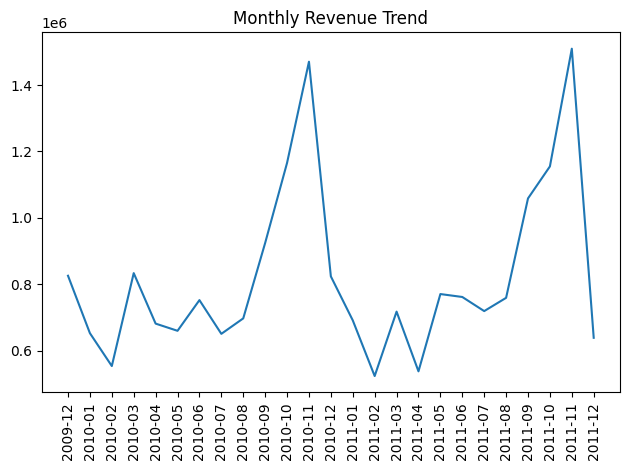

In [22]:
monthly_revenue = (
    df_clean.groupby('Month')['Revenue'].sum().reset_index()
)
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

plt.figure()
plt.plot(monthly_revenue['Month'], monthly_revenue['Revenue'])
plt.xticks(rotation=90)
plt.title('Monthly Revenue Trend')
plt.tight_layout()
plt.show()

This monthly trend highlights seasonality and growth patterns that will be leveraged during feature engineering and modeling.